In [ ]:
!pip install sentinelhub


In [ ]:
from sentinelhub import SHConfig

config = SHConfig()

config.instance_id = '2b4eaaff-824d-49e1-883b-274ac0d71327'
config.sh_client_id = '9a057dac-64a2-494b-a6f5-67f5175d8078'
config.sh_client_secret = '9yehYUDHO8EtjwEg9AWaEAX2jAF3XKKz'

if not config.instance_id or not config.sh_client_id or not config.sh_client_secret:
    raise ValueError("Please provide the Sentinel Hub credentials!")


In [ ]:
from sentinelhub import BBox, CRS

# Define your area of interest (AOI)
bbox = BBox(bbox=[(13.822, 45.850), (13.828, 45.854)], crs=CRS.WGS84)


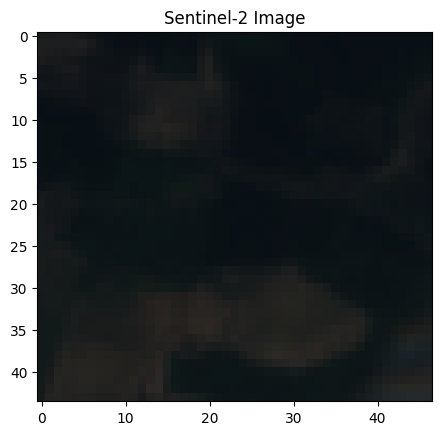

In [ ]:
from sentinelhub import SHConfig, SentinelHubRequest, DataCollection, MimeType, bbox_to_dimensions, BBox, CRS
import numpy as np
import matplotlib.pyplot as plt
# Configure Sentinel Hub API access
config = SHConfig()
config.instance_id = '2b4eaaff-824d-49e1-883b-274ac0d71327'
config.sh_client_id = '9a057dac-64a2-494b-a6f5-67f5175d8078'
config.sh_client_secret = '9yehYUDHO8EtjwEg9AWaEAX2jAF3XKKz'
# Define area of interest (AOI) and resolution
bbox = BBox(bbox=[(13.822, 45.850), (13.828, 45.854)], crs=CRS.WGS84)
resolution = 10  # 10 meters per pixel
time_interval = ('2023-06-01', '2023-06-30')  # Time period of interest
# Define evalscript to process Sentinel-2 data
evalscript = """
    function setup() {
      return {
        input: ["B02", "B03", "B04", "dataMask"],
        output: { bands: 3 }
      };
    }

    function evaluatePixel(sample) {
      return [sample.B04, sample.B03, sample.B02];  // Red, Green, Blue
    }
"""
# Create SentinelHub request with responses
request = SentinelHubRequest(
    data_folder='./data',  # Folder to save the data
    evalscript=evalscript,  # The evalscript for RGB data
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=time_interval
        )
    ],
    bbox=bbox,  # The bounding box (area of interest)
    size=bbox_to_dimensions(bbox, resolution),  # Dimensions of the image based on resolution
    responses=[SentinelHubRequest.output_response('default', MimeType.PNG)],  # Set response to PNG format
    config=config  # Sentinel Hub configuration
)

# Get the data
response = request.get_data()

# Convert to numpy array and display
image = np.array(response[0])  # The image is stored in response[0]
plt.imshow(image)
plt.title('Sentinel-2 Image')
plt.show()


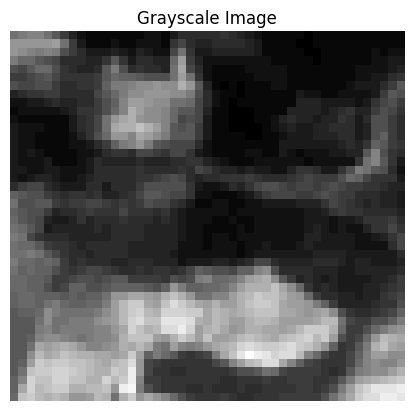

In [ ]:
import cv2

# Convert the RGB image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


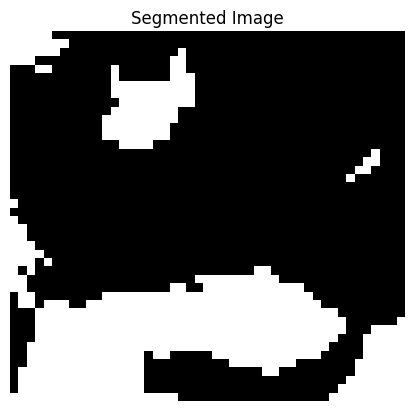

In [ ]:
from sklearn.cluster import KMeans

# Reshape the grayscale image for clustering
reshaped_image = gray_image.reshape((-1, 1))  # Flatten the image

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)
segmented_image = kmeans.labels_.reshape(gray_image.shape)

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')  # Hide axes
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


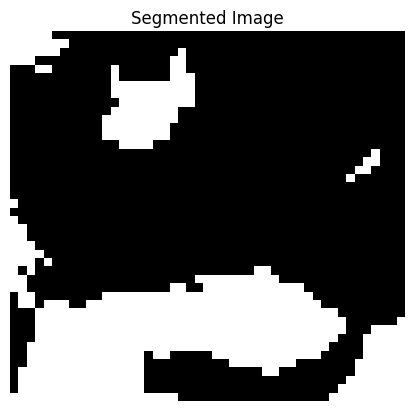

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Assume response has been fetched and converted to a NumPy array
# Example response:
# response = request.get_data()
# image = np.array(response[0])  # The image is stored in response[0]

# Convert the RGB image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Reshape for clustering
reshaped_image = gray_image.reshape((-1, 1))  # Flatten the image

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)
segmented_image = kmeans.labels_.reshape(gray_image.shape)

# Define path for saving the segmented image
output_directory = './data'
segmented_output_path = os.path.join(output_directory, 'segmented_image.png')

# Create directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the segmented image
plt.imsave(segmented_output_path, segmented_image, cmap='gray')

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
# Define path for saving segmented image
segmented_output_path = './data/segmented_image.png'

# Save the segmented image
plt.imsave(segmented_output_path, segmented_image, cmap='gray')


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic feature data and labels
# Replace this with actual feature extraction method
X_train = np.random.rand(1000, 3)  # Example feature vectors with 3 features
y_train = np.random.randint(0, 2, 1000)  # Example labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

# Evaluate the classifier
accuracy = clf.score(X_test_scaled, y_test)
print(f"Classifier accuracy: {accuracy:.2f}")


Classifier accuracy: 0.48


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       104
           1       0.47      0.56      0.51        96

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
[[44 60]
 [42 54]]


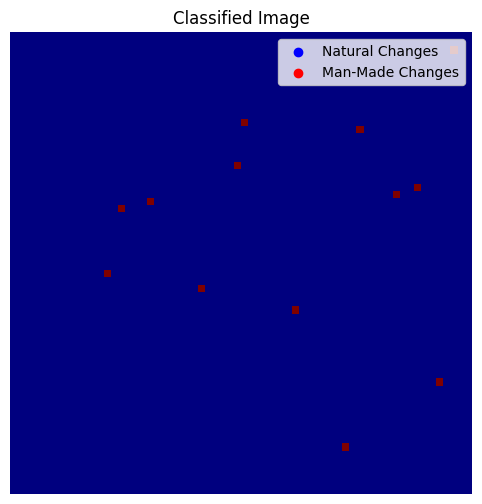

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Example feature extraction for training data
# Replace this with actual data
X_train = np.random.rand(1000, 3)  # Example feature vectors with 3 features (e.g., RGB)
y_train = np.random.randint(0, 2, 1000)  # Example labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

# Evaluate the classifier on the test set
y_test_pred = clf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Example segmented image: let's assume it's an RGB image
# For demonstration, create a synthetic RGB image
# Replace this with actual image data
segmented_image = np.random.randint(0, 255, (64, 64, 3), dtype=np.uint8)  # Example RGB image

# Flatten the RGB image for classification
features = segmented_image.reshape(-1, 3)  # Each pixel will have 3 features (R, G, B)

# Standardize the features
features_scaled = scaler.transform(features)

# Predict using the trained classifier
predictions = clf.predict(features_scaled)

# Reshape predictions to match the image dimensions
classified_image = predictions.reshape(segmented_image.shape[:2])  # Only take the first 2 dimensions (height, width)

# Display the classified image
plt.figure(figsize=(8, 6))
plt.imshow(classified_image, cmap='jet')
plt.title('Classified Image')
plt.axis('off')  # Hide axes

# Add a custom legend
plt.scatter([], [], c='blue', label='Natural Changes', marker='o')
plt.scatter([], [], c='red', label='Man-Made Changes', marker='o')
plt.legend(loc='upper right')

plt.show()

# Save the classified image
classified_output_path = './data/classified_image.png'
plt.imsave(classified_output_path, classified_image, cmap='jet')
